# Assignment 4
Consider a DummyBinaryClassifier that returns a random label in {True, False} for any test input
that’s fed to it. This classifier does not require any training! Hope, that was already obvious to you.
Implement this DummyBinaryClassifier as a Python class by extending the BaseEstimator class of
sklearn, so that you have mandatory methods such as fit(X, y) and predict(X) are implemented.
As your guess, the fit() method would be a dummy ‘pass’, but the predict() method would
return True or False randomly

# Task 1
Let’s measure the label distribution (prior probability) of the predictions made by
DummyBinaryClassifier. As you guessed, the label distribution is dependent on the random
generator, which typically could be one of {Normal, Bernoulli or Uniform} distributions. As a part of
Task 1, you are to implement all the above three generators (using libraries). You may choose the
generator type while instantiating the classifier object. Moreover, Bernoulli requires ‘p’ as a
parameter representing the probability of “True”. Likewise, the normal and uniform distributions
require a threshold to convert the discrete samples into Booleans. You may assume that the
threshold is in [0,1] range. Typically, you will instantiate as
DummyBinaryClassifier(method=’bernoulli’, p=0.5). The expectation is a line-plot with
the x-axis represent the p in [0,1] in steps of 0.1 and the y-axis representing the Pr(True). Your plot
will have 3 such lines representing 3 different random generators

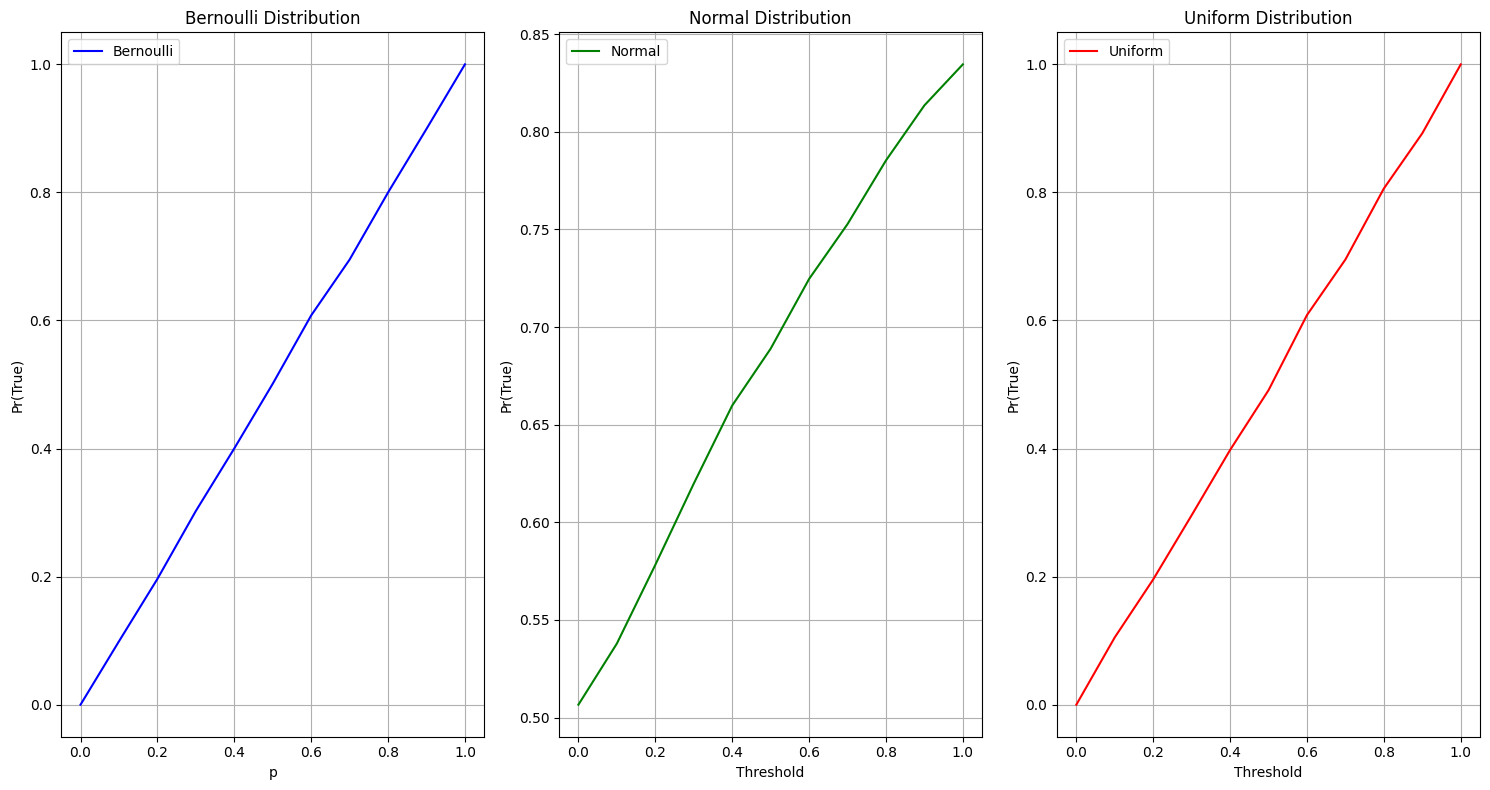

In [67]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

class DummyBinaryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, method='bernoulli', p=0.5, threshold=0.5):
        self.method = method
        self.p = p
        self.threshold = threshold

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        n_samples = len(X)
        if self.method == 'bernoulli':
            return np.random.rand(n_samples) < self.p
        elif self.method == 'normal':
            return np.random.normal(size=n_samples) < self.threshold
        elif self.method == 'uniform':
            return np.random.uniform(size=n_samples) < self.threshold
        else:
            raise ValueError("Method must be 'bernoulli', 'normal', or 'uniform'")


p_values = np.arange(0, 1.1, 0.1)

bernoulli_probs = []
normal_probs = []
uniform_probs = []

for p in p_values:
    # Bernoulli Distribution
    clf_bernoulli = DummyBinaryClassifier(method='bernoulli', p=p)
    predictions = clf_bernoulli.predict(np.zeros(10000))
    bernoulli_probs.append(np.mean(predictions))

    # Normal Distribution
    clf_normal = DummyBinaryClassifier(method='normal', threshold=p)
    predictions = clf_normal.predict(np.zeros(10000))
    normal_probs.append(np.mean(predictions))

    # Uniform Distribution
    clf_uniform = DummyBinaryClassifier(method='uniform', threshold=p)
    predictions = clf_uniform.predict(np.zeros(10000))
    uniform_probs.append(np.mean(predictions))

plt.figure(figsize=(15, 8))

# Subplot 1: Bernoulli Distribution
plt.subplot(1,3, 1)
plt.plot(p_values, bernoulli_probs, label='Bernoulli', color='blue')
plt.xlabel('p')
plt.ylabel('Pr(True)')
plt.title('Bernoulli Distribution')
plt.grid(True)
plt.legend()

# Subplot 2: Normal Distribution
plt.subplot(1,3, 2)
plt.plot(p_values, normal_probs, label='Normal', color='green')
plt.xlabel('Threshold')
plt.ylabel('Pr(True)')
plt.title('Normal Distribution')
plt.grid(True)
plt.legend()

# Subplot 3: Uniform Distribution
plt.subplot(1,3, 3)
plt.plot(p_values, uniform_probs, label='Uniform', color='red')
plt.xlabel('Threshold')
plt.ylabel('Pr(True)')
plt.title('Uniform Distribution')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Task 2

Consider the IRIS dataset, but convert the 3-class dataset into a binary class dataset by choosing the
majority class as say class True and the remaining two classes as class False. Now, using the
bernoulli version of the DummyBinaryClassifier, make the prediction of binary IRIS dataset.
1. Report the label prior of the binary IRIS dataset.
2. Compute the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in
steps of 0.1 and plot the P, R, C as line plots.
3. Using the P & R values, plot PRC.
4. Using TPR and FPR, plot RoC.
5. Report the AUPRC and AURoC

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,precision_recall_fscore_support,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin


In [69]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
import pandas as pd
x=iris.data
y=iris.target
df=pd.DataFrame(data=x[:,0:4],columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [71]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Label Prior (Pr(True)) of Binary IRIS Dataset: 0.33



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


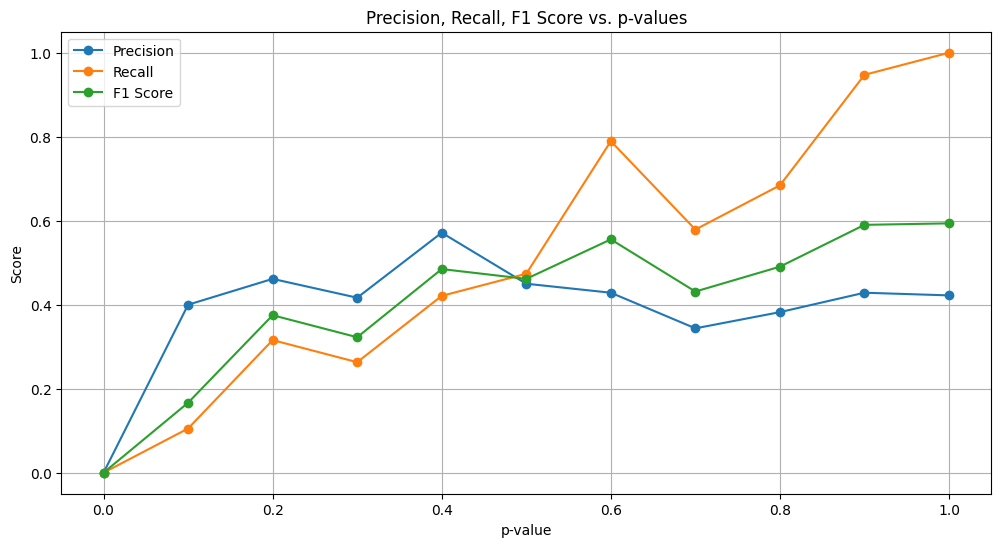

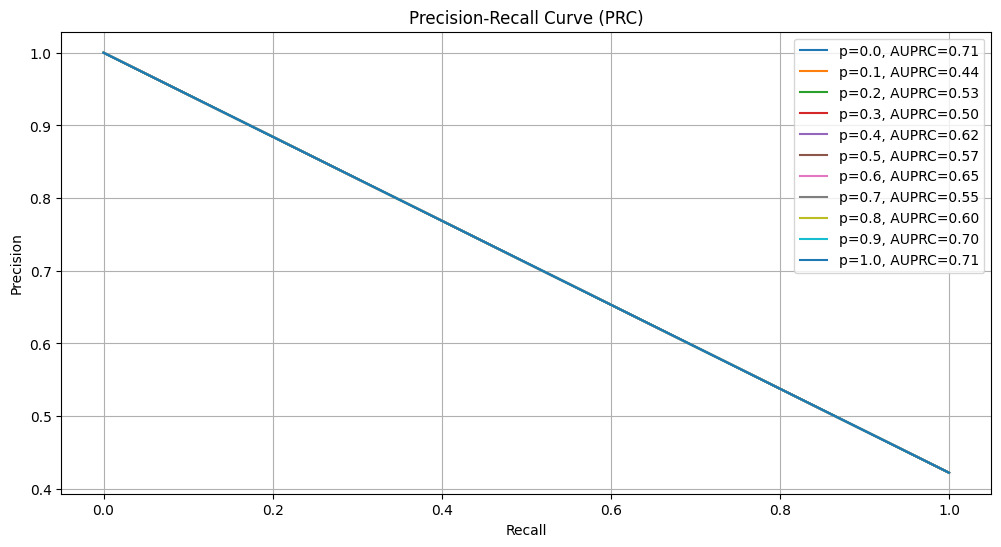

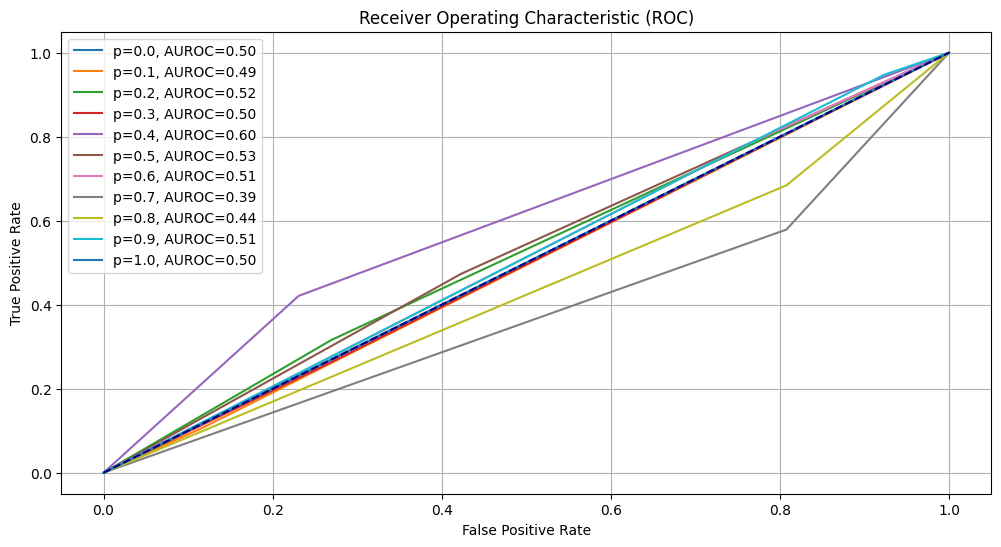

Average AUPRC across p-values: 0.60
Average AUROC across p-values: 0.50


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, ClassifierMixin

iris = load_iris()
X = iris.data
y = iris.target

y_binary = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

class DummyBinaryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, method='bernoulli', p=0.5, threshold=0.5):
        self.method = method
        self.p = p

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        n_samples = len(X)
        return np.random.rand(n_samples) < self.p

# 1. Report the label prior of the binary IRIS dataset
label_prior = np.mean(y_binary)
print(f"Label Prior (Pr(True)) of Binary IRIS Dataset: {label_prior:.2f}")
print()

precision_scores = []
recall_scores = []
f1_scores = []
auprc_scores = []
aurocs = []
tprs = []
fprs = []

# 2. Compute Precision, Recall, F1 for different p-values in [0,1]
p_values = np.arange(0, 1.1, 0.1)
for p in p_values:
    clf = DummyBinaryClassifier(method='bernoulli', p=p)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute Precision, Recall, F1
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # 3. Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
    auprc = auc(recall_curve, precision_curve)
    auprc_scores.append(auprc)

    # 4. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    aurocs.append(roc_auc)
    tprs.append(tpr)
    fprs.append(fpr)

# Plot Precision, Recall, F1 vs. p-values
plt.figure(figsize=(12, 6))
plt.plot(p_values, precision_scores, label='Precision', marker='o')
plt.plot(p_values, recall_scores, label='Recall', marker='o')
plt.plot(p_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('p-value')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs. p-values')
plt.legend()
plt.grid(True)
plt.show()

# 5. Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))
for i, p in enumerate(p_values):
    plt.plot(recall_curve, precision_curve, label=f'p={p:.1f}, AUPRC={auprc_scores[i]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PRC)')
plt.legend()
plt.grid(True)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(12, 6))
for i, p in enumerate(p_values):
    plt.plot(fprs[i], tprs[i], label=f'p={p:.1f}, AUROC={aurocs[i]:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()

# Report AUPRC and AUROC
print(f"Average AUPRC across p-values: {np.mean(auprc_scores):.2f}")
print(f"Average AUROC across p-values: {np.mean(aurocs):.2f}")


# Task 3
Generate the visualization of the decision boundaries induced by DummyBinaryClassifier at
different values of p in [0, 1] in steps of 0.25 for all the three random generators.


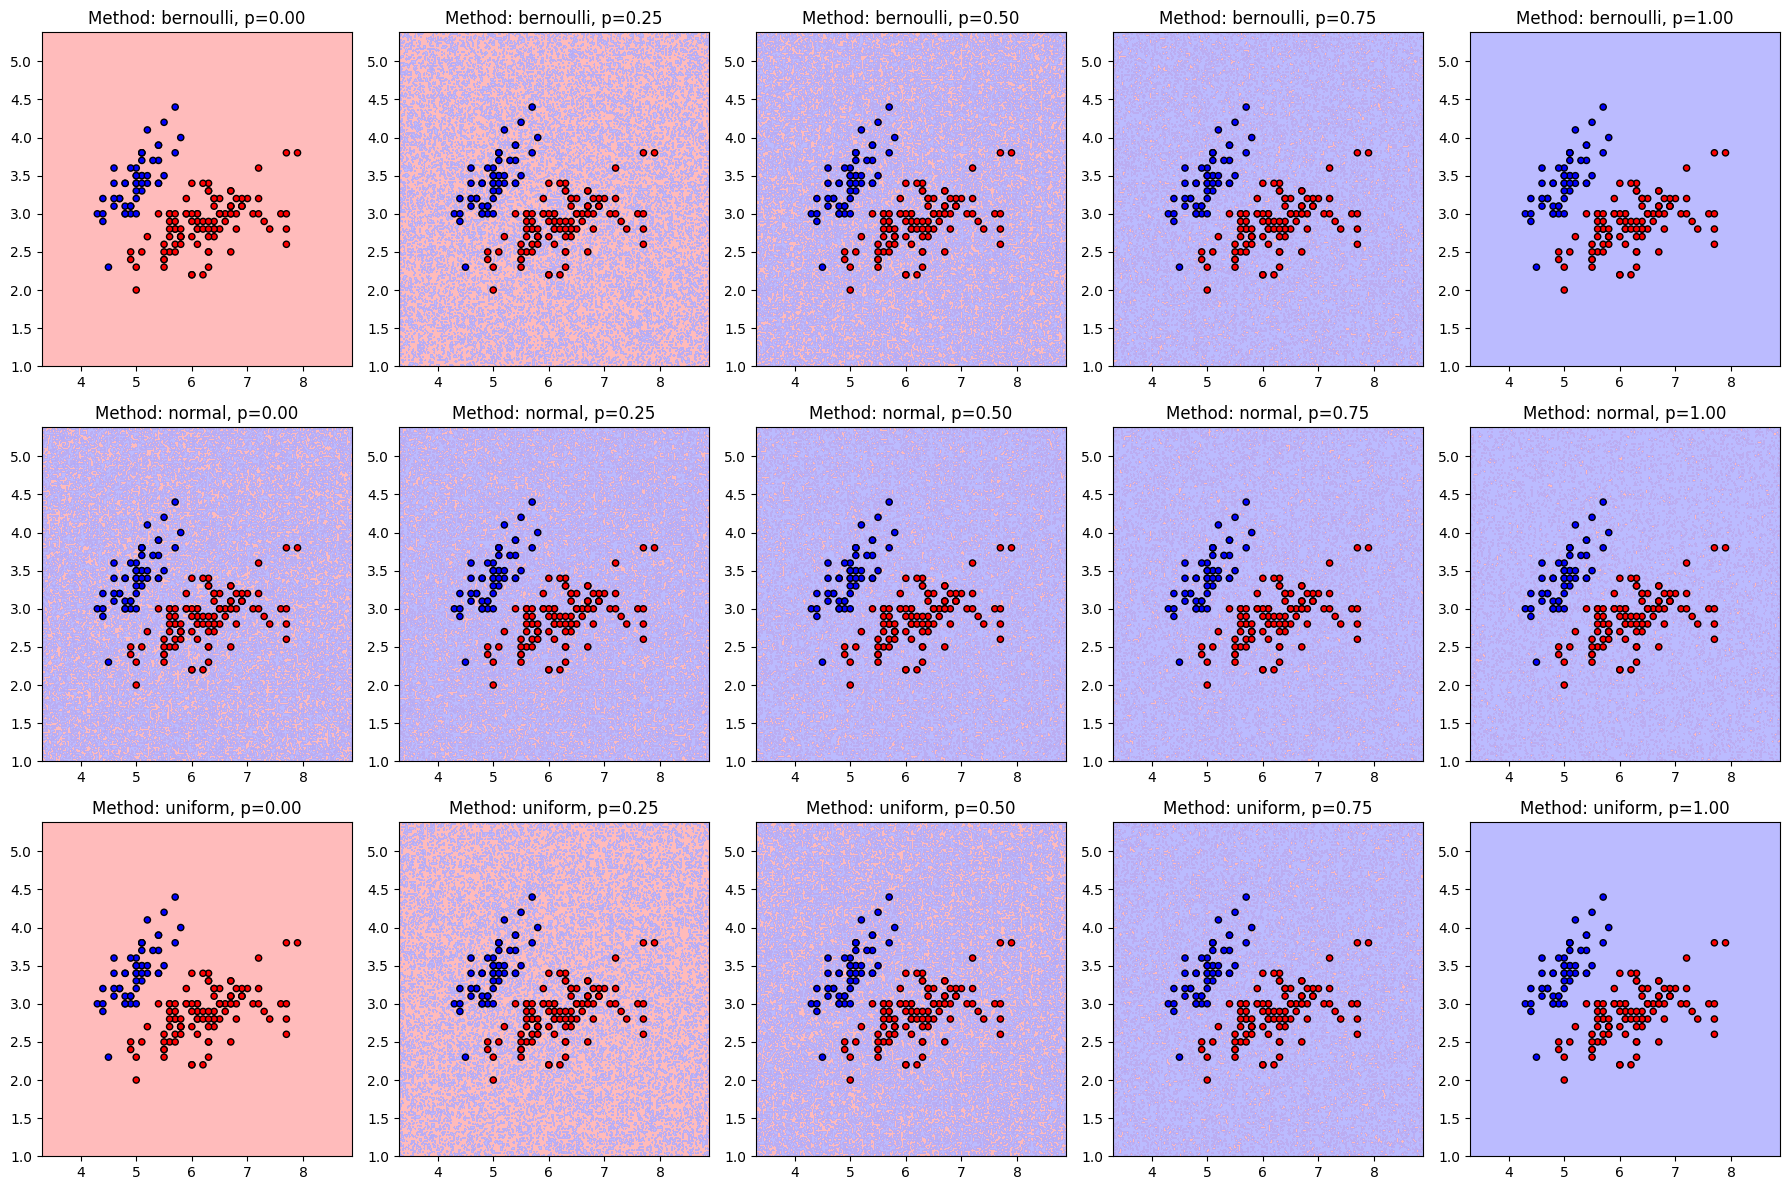

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin
from matplotlib.colors import ListedColormap

class DummyBinaryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, method='bernoulli', p=0.5, threshold=0.5):
        self.method = method
        self.p = p
        self.threshold = threshold

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        n_samples = len(X)
        if self.method == 'bernoulli':
            return np.random.rand(n_samples) < self.p
        elif self.method == 'normal':
            return np.random.randn(n_samples) < self.threshold
        elif self.method == 'uniform':
            return np.random.uniform(0, 1, n_samples) < self.threshold

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

p_values = np.arange(0, 1.25, 0.25)
methods = ['bernoulli', 'normal', 'uniform']

fig, axes = plt.subplots(len(methods), len(p_values), figsize=(18, 12))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

for i, method in enumerate(methods):
    for j, p in enumerate(p_values):
        clf = DummyBinaryClassifier(method=method, p=p, threshold=p)
        clf.fit(X, y)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax = axes[i, j]
        ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f'Method: {method}, p={p:.2f}')


plt.tight_layout()
plt.show()
